In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [26]:
tickers=['PG','MSFT','F','GE']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=yf.download(t,start='1995-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7550 entries, 1995-01-03 to 2024-12-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7550 non-null   float64
 1   MSFT    7550 non-null   float64
 2   F       7550 non-null   float64
 3   GE      7550 non-null   float64
dtypes: float64(4)
memory usage: 294.9 KB


In [30]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.441168,2.319453,3.569732,20.200678
1995-01-04,7.381516,2.336313,3.665778,20.200678
1995-01-05,7.277133,2.297776,3.633761,20.250174
1995-01-06,7.292046,2.336313,3.633761,20.151142
1995-01-09,7.262224,2.321862,3.697795,19.953091


In [32]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2024-12-20,168.059998,436.600006,9.88,168.096146
2024-12-23,168.110001,435.250000,9.90,168.745102
2024-12-24,168.940002,439.329987,10.02,171.211075
2024-12-26,170.160004,438.109985,10.07,171.869995
2024-12-27,169.529999,430.529999,10.03,170.080002


In [34]:
mydata.iloc[0]

PG       7.441168
MSFT     2.319453
F        3.569732
GE      20.200678
Name: 1995-01-03 00:00:00, dtype: float64

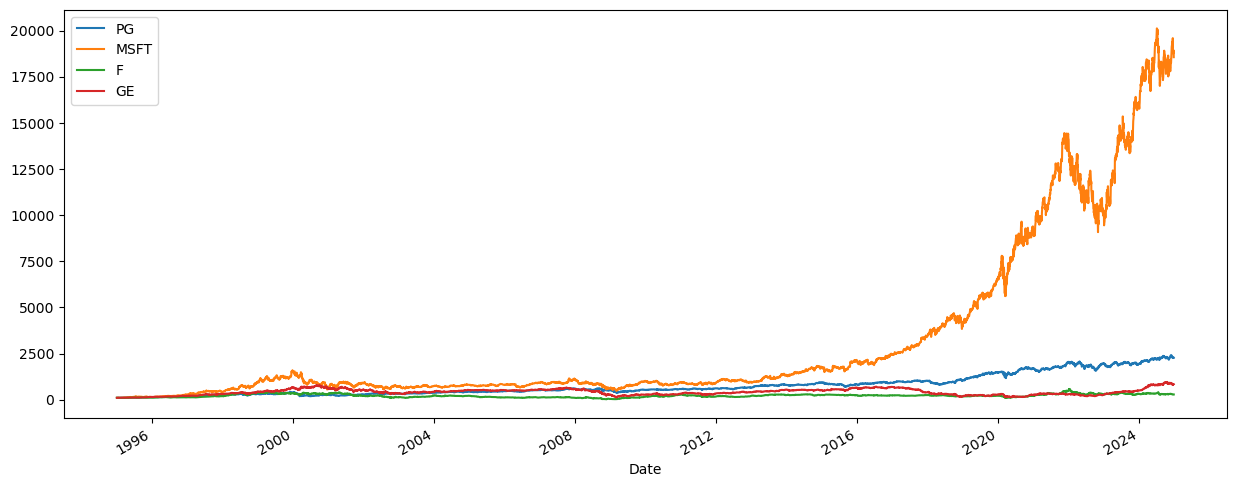

In [44]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [46]:
returns = (mydata/mydata.shift(1))-1

In [48]:
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002450
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [50]:
weights=np.array([0.25,0.25,0.25,0.25])

In [52]:
np.dot(returns,weights)

array([        nan,  0.00653955, -0.00922993, ...,  0.01026151,
        0.00332077, -0.00884775])

In [54]:
annual_returns = returns.mean()*250
annual_returns

PG      0.127617
MSFT    0.220844
F       0.114302
GE      0.121296
dtype: float64

In [58]:
pfolio=str(round(np.dot(annual_returns, weights),5)*100)+'%'
print (pfolio)

14.601%
